## UFood Marketing Analysis

In [134]:
import pandas as pd

In [135]:
food = pd.read_csv(r"C:\Mac\Home\Documents\Projects\Resources\u_food_marketing.csv")
food

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,53,2540,0,1,0,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,74,2178,0,0,0,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,39,2314,1,0,0,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,64,2315,0,0,0,1,0,0,0,0,1,0,782,721,0


In [136]:
food.drop_duplicates(keep=False, inplace=True)

In [137]:
food['Total_Children'] = food[['Kidhome','Teenhome']].sum(axis=1)

In [138]:
food['marital_Divorced'] = food['marital_Divorced'].replace({1:5,0:0})
food['marital_Married'] = food['marital_Married'].replace({1:4,0:0})
food['marital_Single'] = food['marital_Single'].replace({1:3,0:0})
food['marital_Together'] = food['marital_Together'].replace({1:2,0:0})
food['marital_Widow'] = food['marital_Widow'].replace({1:1,0:0})

In [139]:
pd.set_option('display.max.columns', 50)

In [140]:
food['Marital_Status'] = food[['marital_Divorced','marital_Married','marital_Single','marital_Together','marital_Widow']].sum(axis=1)

In [141]:
food['Marital_String'] = food['Marital_Status'].map({5:'Divorced', 4:'Married',3:'Single',2:'Together',1:'Widow'})

In [142]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1843 entries, 0 to 2204
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                1843 non-null   float64
 1   Kidhome               1843 non-null   int64  
 2   Teenhome              1843 non-null   int64  
 3   Recency               1843 non-null   int64  
 4   MntWines              1843 non-null   int64  
 5   MntFruits             1843 non-null   int64  
 6   MntMeatProducts       1843 non-null   int64  
 7   MntFishProducts       1843 non-null   int64  
 8   MntSweetProducts      1843 non-null   int64  
 9   MntGoldProds          1843 non-null   int64  
 10  NumDealsPurchases     1843 non-null   int64  
 11  NumWebPurchases       1843 non-null   int64  
 12  NumCatalogPurchases   1843 non-null   int64  
 13  NumStorePurchases     1843 non-null   int64  
 14  NumWebVisitsMonth     1843 non-null   int64  
 15  AcceptedCmp3          1843

In [143]:
food['education_2n Cycle'] = food['education_2n Cycle'].replace({1:1,0:0})
food['education_Basic'] = food['education_Basic'].replace({1:2,0:0})
food['education_Graduation'] = food['education_Graduation'].replace({1:3,0:0})
food['education_Master'] = food['education_Master'].replace({1:4,0:0})
food['education_PhD'] = food['education_PhD'].replace({1:5,0:0})

In [144]:
food['Education_Status'] = food[['education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD']].sum(axis=1)

In [145]:
food['Accepted_Campaigns'] = food[['AcceptedCmp5','AcceptedCmp4','AcceptedCmp3','AcceptedCmp2','AcceptedCmp1','Response']].sum(axis=1)

In [146]:
food['Accepted_Campaigns'] = (food['Accepted_Campaigns'] !=0).astype(int)

In [147]:
food.corr(method='pearson',numeric_only=True)['Accepted_Campaigns'].sort_values(ascending=False)

Accepted_Campaigns      1.000000
AcceptedCmpOverall      0.713352
Response                0.685109
AcceptedCmp4            0.465985
AcceptedCmp3            0.453742
AcceptedCmp5            0.441264
AcceptedCmp1            0.426687
MntWines                0.416651
MntTotal                0.393910
MntRegularProds         0.391931
NumCatalogPurchases     0.322143
MntMeatProducts         0.298240
Income                  0.292812
NumWebPurchases         0.221217
MntGoldProds            0.188209
AcceptedCmp2            0.174619
MntSweetProducts        0.156430
MntFruits               0.149973
MntFishProducts         0.145404
NumStorePurchases       0.144965
Customer_Days           0.083874
Education_Status        0.062534
marital_Single          0.051947
education_PhD           0.043488
marital_Widow           0.038379
Age                     0.013540
education_Master        0.012535
marital_Divorced        0.002049
education_Graduation   -0.006359
Marital_Status         -0.021551
marital_To

In [148]:
import seaborn as sns

<Axes: >

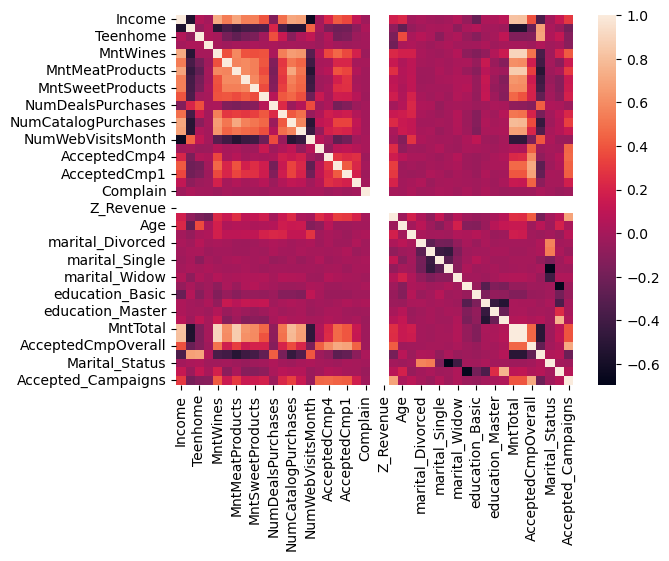

In [149]:
sns.heatmap(food.corr(method='pearson',numeric_only=True))

<Axes: >

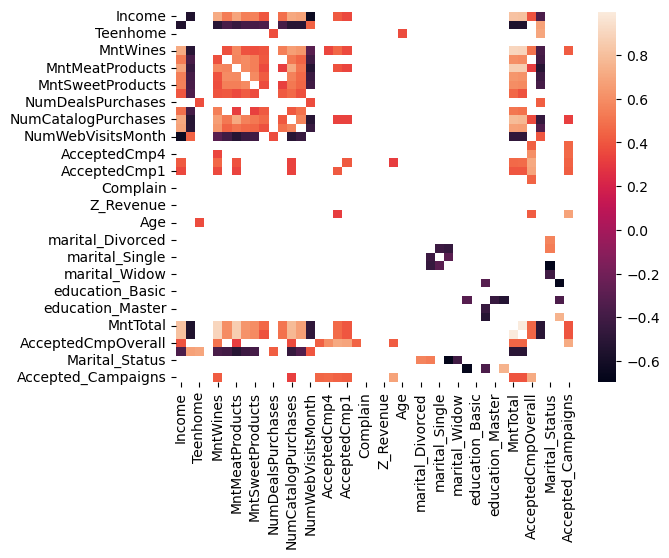

In [150]:
all_correlations = food.corr(method='pearson',numeric_only=True)
all_correlations = all_correlations[((all_correlations>0.3) & (all_correlations<1)) | ((all_correlations<-0.3) & (all_correlations>-1))]

sns.heatmap(all_correlations)

In [151]:
all_correlations['Accepted_Campaigns']

Income                       NaN
Kidhome                      NaN
Teenhome                     NaN
Recency                      NaN
MntWines                0.416651
MntFruits                    NaN
MntMeatProducts              NaN
MntFishProducts              NaN
MntSweetProducts             NaN
MntGoldProds                 NaN
NumDealsPurchases            NaN
NumWebPurchases              NaN
NumCatalogPurchases     0.322143
NumStorePurchases            NaN
NumWebVisitsMonth            NaN
AcceptedCmp3            0.453742
AcceptedCmp4            0.465985
AcceptedCmp5            0.441264
AcceptedCmp1            0.426687
AcceptedCmp2                 NaN
Complain                     NaN
Z_CostContact                NaN
Z_Revenue                    NaN
Response                0.685109
Age                          NaN
Customer_Days                NaN
marital_Divorced             NaN
marital_Married              NaN
marital_Single               NaN
marital_Together             NaN
marital_Wi

In [152]:
age_groups = [(20,29),(30,39),(40,49),(50,59),(60,69),(70,84)]

def assign_age_group(Age):
    for age_range in age_groups:
        if age_range[0] <= Age <= age_range[1]:
            return f"{age_range[0]} - {age_range[1]}"
    return("Unknown")

food['Age_Group'] = food['Age'].apply(assign_age_group)

In [153]:
food[['Age','Age_Group']].head()

,Age,Age_Group
0,63,60 - 69
1,66,60 - 69
2,55,50 - 59
3,36,30 - 39
4,39,30 - 39


<Axes: xlabel='Age_Group', ylabel='Accepted_Campaigns'>

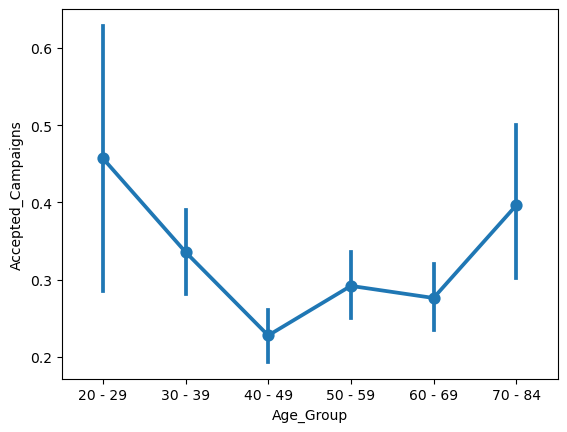

In [154]:
age_order = ['20 - 29','30 - 39','40 - 49','50 - 59','60 - 69','70 - 84']
sns.pointplot(data=food, x='Age_Group', y='Accepted_Campaigns', order = age_order)

In [155]:
counts = food['Age_Group'].value_counts()

In [156]:
percentage = counts/food.shape[0]
percentage

Age_Group
40 - 49    0.316875
50 - 59    0.236028
60 - 69    0.221921
30 - 39    0.148671
70 - 84    0.057515
20 - 29    0.018991
Name: count, dtype: float64

In [157]:
percent_food = percentage.reset_index()
percent_food.columns = ['age_range','percentage']

In [158]:
percent_food.sort_values('age_range')

,age_range,percentage
5,20 - 29,0.018991
3,30 - 39,0.148671
0,40 - 49,0.316875
1,50 - 59,0.236028
2,60 - 69,0.221921
4,70 - 84,0.057515


In [159]:
import matplotlib.pyplot as plt

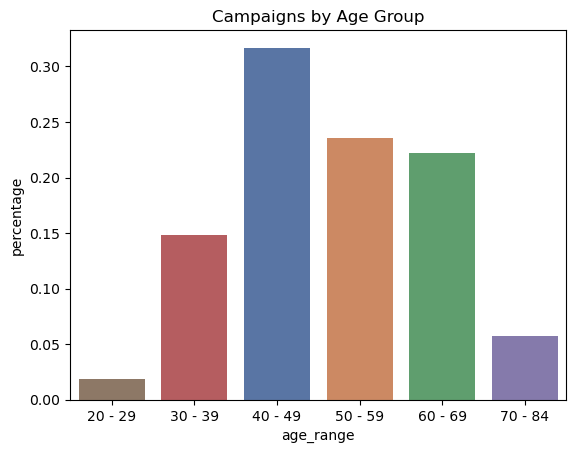

In [160]:
age_order = ['20 - 29','30 - 39','40 - 49','50 - 59','60 - 69','70 - 84']
sns.barplot(percent_food,x = 'age_range', y='percentage',order=age_order, palette='deep', hue='age_range')
plt.title('Campaigns by Age Group')
plt.show()

In [161]:
food.groupby('Age_Group')['MntTotal'].sum().reset_index()

,Age_Group,MntTotal
0,20 - 29,31526
1,30 - 39,125108
2,40 - 49,272436
3,50 - 59,265067
4,60 - 69,260779
5,70 - 84,86575


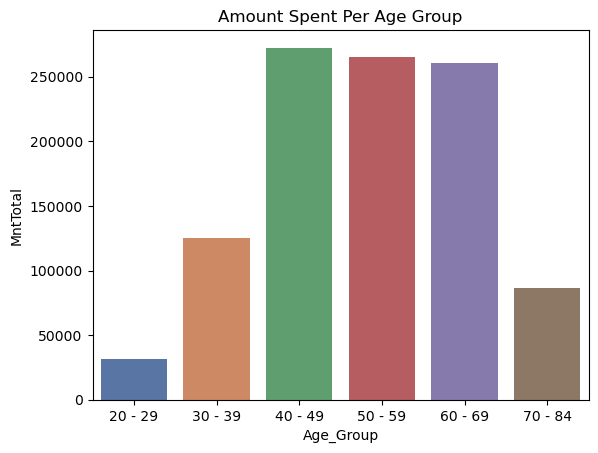

In [162]:
grouped_food = food.groupby('Age_Group')['MntTotal'].sum().reset_index()
sns.barplot(grouped_food,x = 'Age_Group', y='MntTotal',order=age_order, palette='deep', hue='Age_Group')
plt.title('Amount Spent Per Age Group')
plt.show()

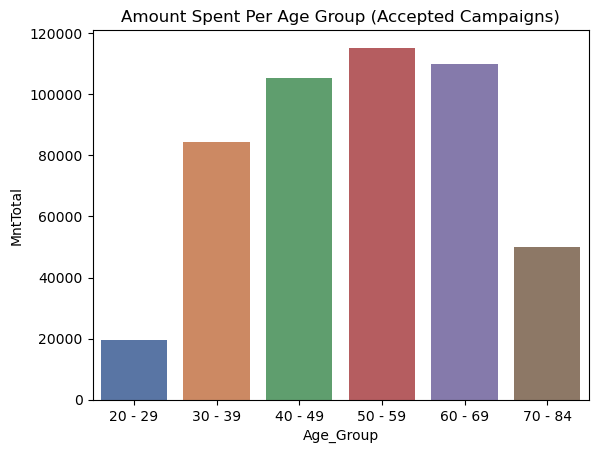

In [163]:
acct_camp = food[food['Accepted_Campaigns'] != 0]

grouped_food = acct_camp.groupby('Age_Group')['MntTotal'].sum().reset_index()
sns.barplot(grouped_food,x = 'Age_Group', y='MntTotal',order=age_order, palette='deep', hue='Age_Group')
plt.title('Amount Spent Per Age Group (Accepted Campaigns)')
plt.show()

In [164]:
sum_food = pd.DataFrame(food[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(), columns = ['Sums'])

In [165]:
sum_food = sum_food.reset_index()
sum_food

,index,Sums
0,NumWebPurchases,7619
1,NumCatalogPurchases,4871
2,NumStorePurchases,10675


In [166]:
sum_food.rename(columns = {'index':'Type_of_Purchase'}, inplace = True)

Text(0.5, 1.0, 'Where purchases are made (all purchases)')

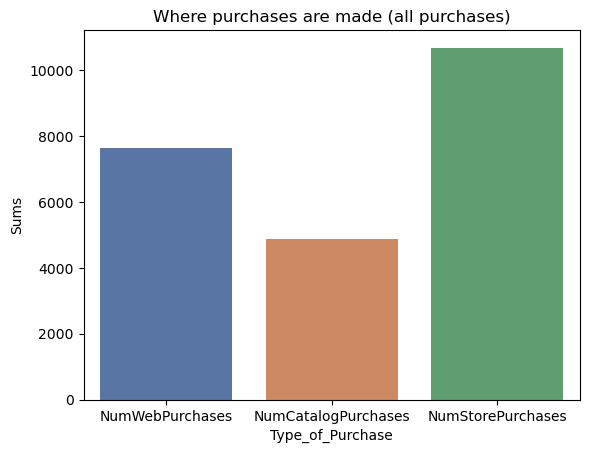

In [167]:
sns.barplot(x = 'Type_of_Purchase', y = 'Sums', data = sum_food, palette='deep',hue='Type_of_Purchase')
plt.title('Where purchases are made (all purchases)')

In [168]:
acct_camp = food[food['Accepted_Campaigns'] != 0]
acct_food = pd.DataFrame(acct_camp[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(), columns = ['Sums'])
acct_food = acct_food.reset_index()

Text(0.5, 1.0, 'Where purchases are made (campaigns only)')

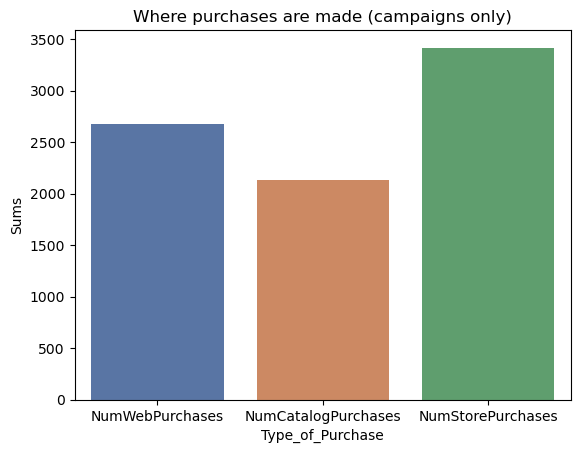

In [169]:
acct_food.rename(columns = {'index':'Type_of_Purchase'}, inplace = True)
sns.barplot(x = 'Type_of_Purchase', y = 'Sums', data = acct_food, palette='deep',hue='Type_of_Purchase')
plt.title('Where purchases are made (campaigns only)')

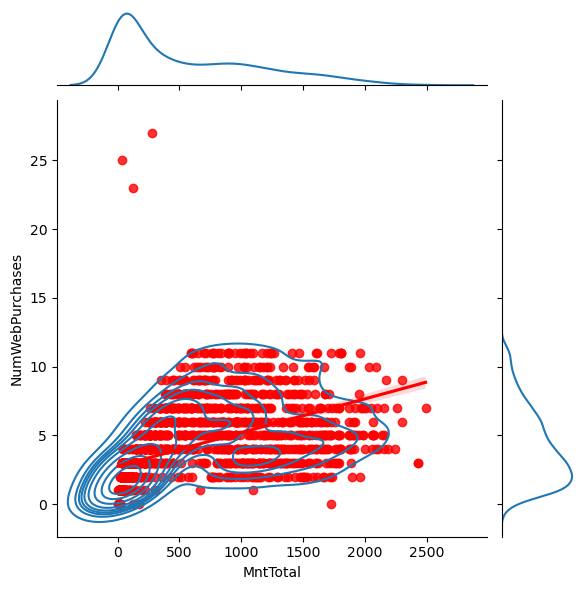

In [170]:
x = sns.jointplot(data=food,x='MntTotal',y='NumWebPurchases',kind='kde')
x.plot_joint(sns.regplot, color = 'r')

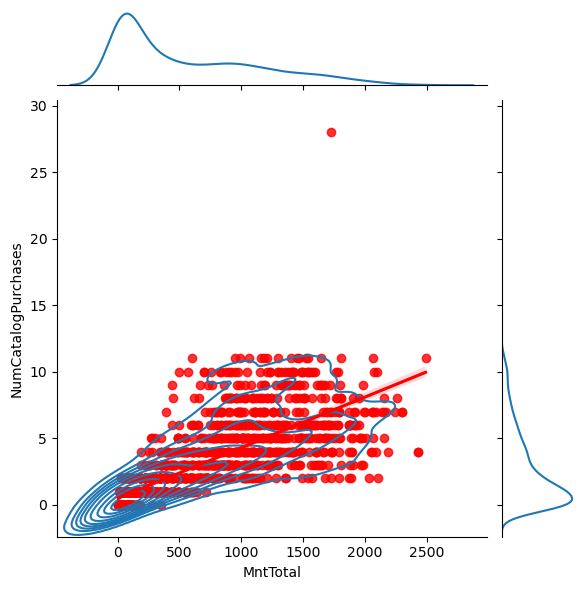

In [171]:
y = sns.jointplot(data=food,x='MntTotal',y='NumCatalogPurchases',kind='kde')
y.plot_joint(sns.regplot, color = 'r')

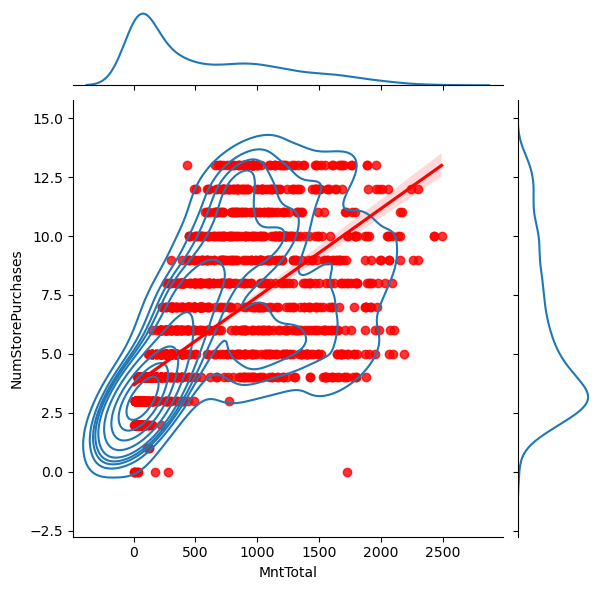

In [172]:
z = sns.jointplot(data=food,x='MntTotal',y='NumStorePurchases',kind='kde')
z.plot_joint(sns.regplot, color = 'r')

In [173]:
# 2 directions: Boost up the higher percentage catalog customers. OR Focus on In Store/Web becuase they have more traffic.

<Axes: xlabel='Total_Children', ylabel='MntTotal'>

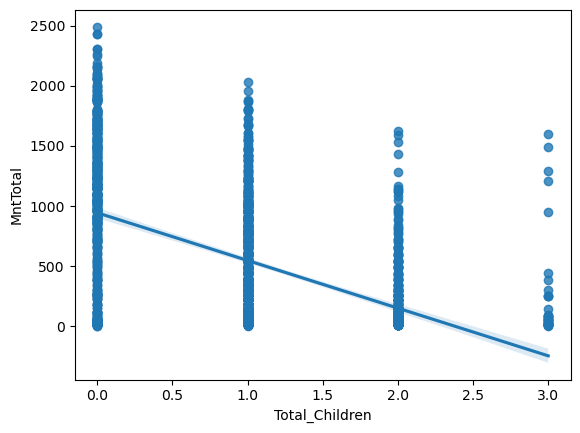

In [174]:
sns.regplot(x = 'Total_Children', y = 'MntTotal', data = food)

<Axes: xlabel='Total_Children', ylabel='Accepted_Campaigns'>

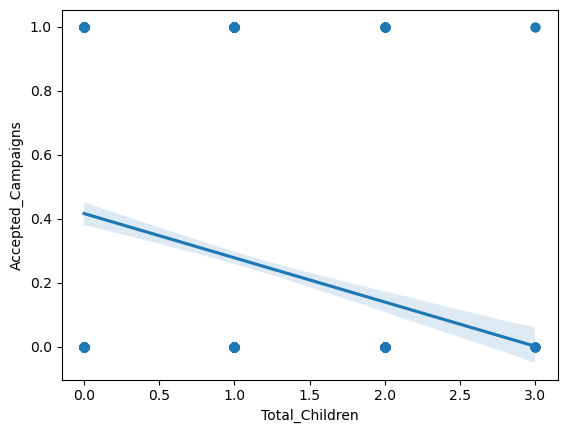

In [175]:
sns.regplot(x = 'Total_Children', y = 'Accepted_Campaigns', data = food)

In [176]:
#Less kids = more acceptable to campagns and more money spent

<Axes: xlabel='Education_Status', ylabel='Accepted_Campaigns'>

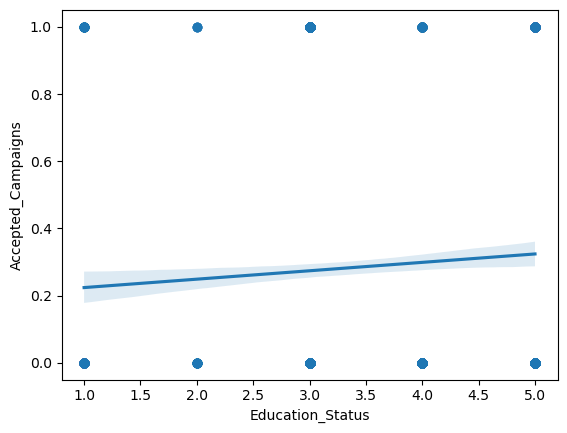

In [177]:
sns.regplot(x = 'Education_Status', y = 'Accepted_Campaigns', data = food)

In [178]:
# Weak correlation between education and campaign acceptance

Text(0.5, 1.0, 'count of marital status')

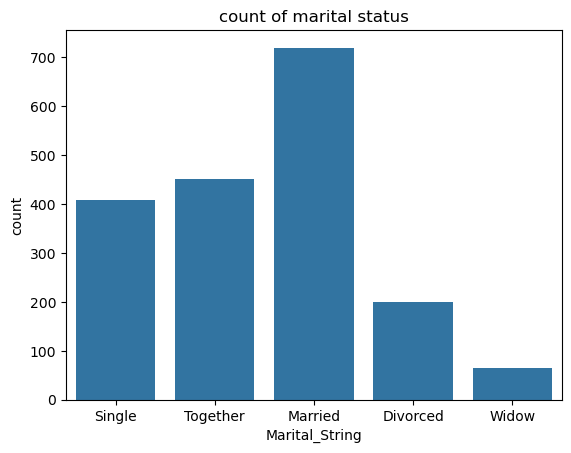

In [182]:
sns.countplot(x='Marital_String',data=food)
plt.title('count of marital status')

In [187]:
rel_food = food.groupby('Marital_String')['MntTotal'].sum().reset_index()

In [190]:
accpt = food[food['Accepted_Campaigns'] != 0]
rel_food = accpt.groupby('Marital_String')['MntTotal'].sum().reset_index()

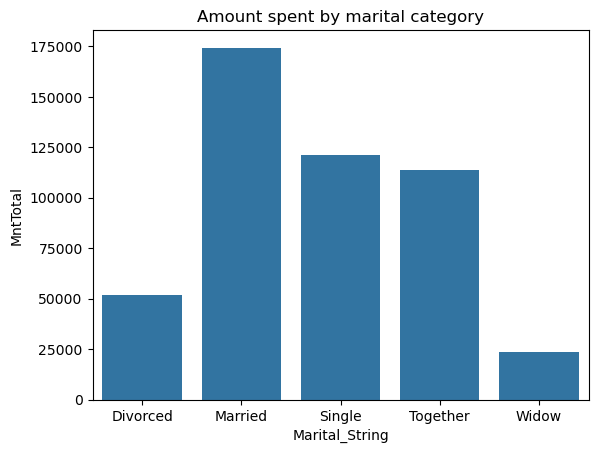

In [199]:

sns.barplot(rel_food,x='Marital_String',y='MntTotal')
plt.title('Amount spent by marital category')
plt.show()

In [203]:
total = food['Marital_String'].value_counts()
accepted = food[food['Accepted_Campaigns'] == 1]['Marital_String'].value_counts()

In [204]:
pect_marital = accepted / total * 100

In [205]:
pect_food = pect_marital.reset_index()
pect_food.columns = ['Marital_Status', 'Percentage']

<Axes: xlabel='Marital_Status', ylabel='Percentage'>

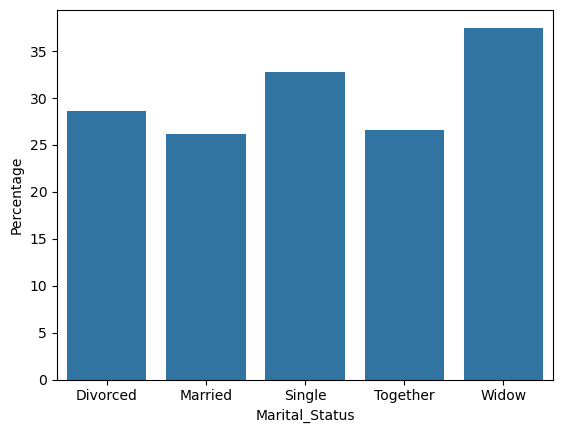

In [206]:
sns.barplot(x= 'Marital_Status', y = 'Percentage', data = pect_food)

In [200]:
# Marriage - Married, single, together are spending a lot more money than widow and divorced.